In [95]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [96]:
zip_file_path = 'data.zip'
csv_file_inside_zip1 = 'train_set.csv'
csv_file_inside_zip2 = 'test_set.csv'

In [97]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip1) as csv_file:
        dftrain = pd.read_csv(csv_file)

In [98]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip2) as csv_file:
        dftest = pd.read_csv(csv_file)

In [99]:
warnings.filterwarnings("ignore")

In [100]:
dftrain.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Mode'],
      dtype='object')

In [101]:
dftrain.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Mode'],
      dtype='object')

In [102]:
dftrain.shape, dftest.shape

((579807, 45), (64424, 45))

In [103]:
dftrain.duplicated().sum()

0

<Axes: >

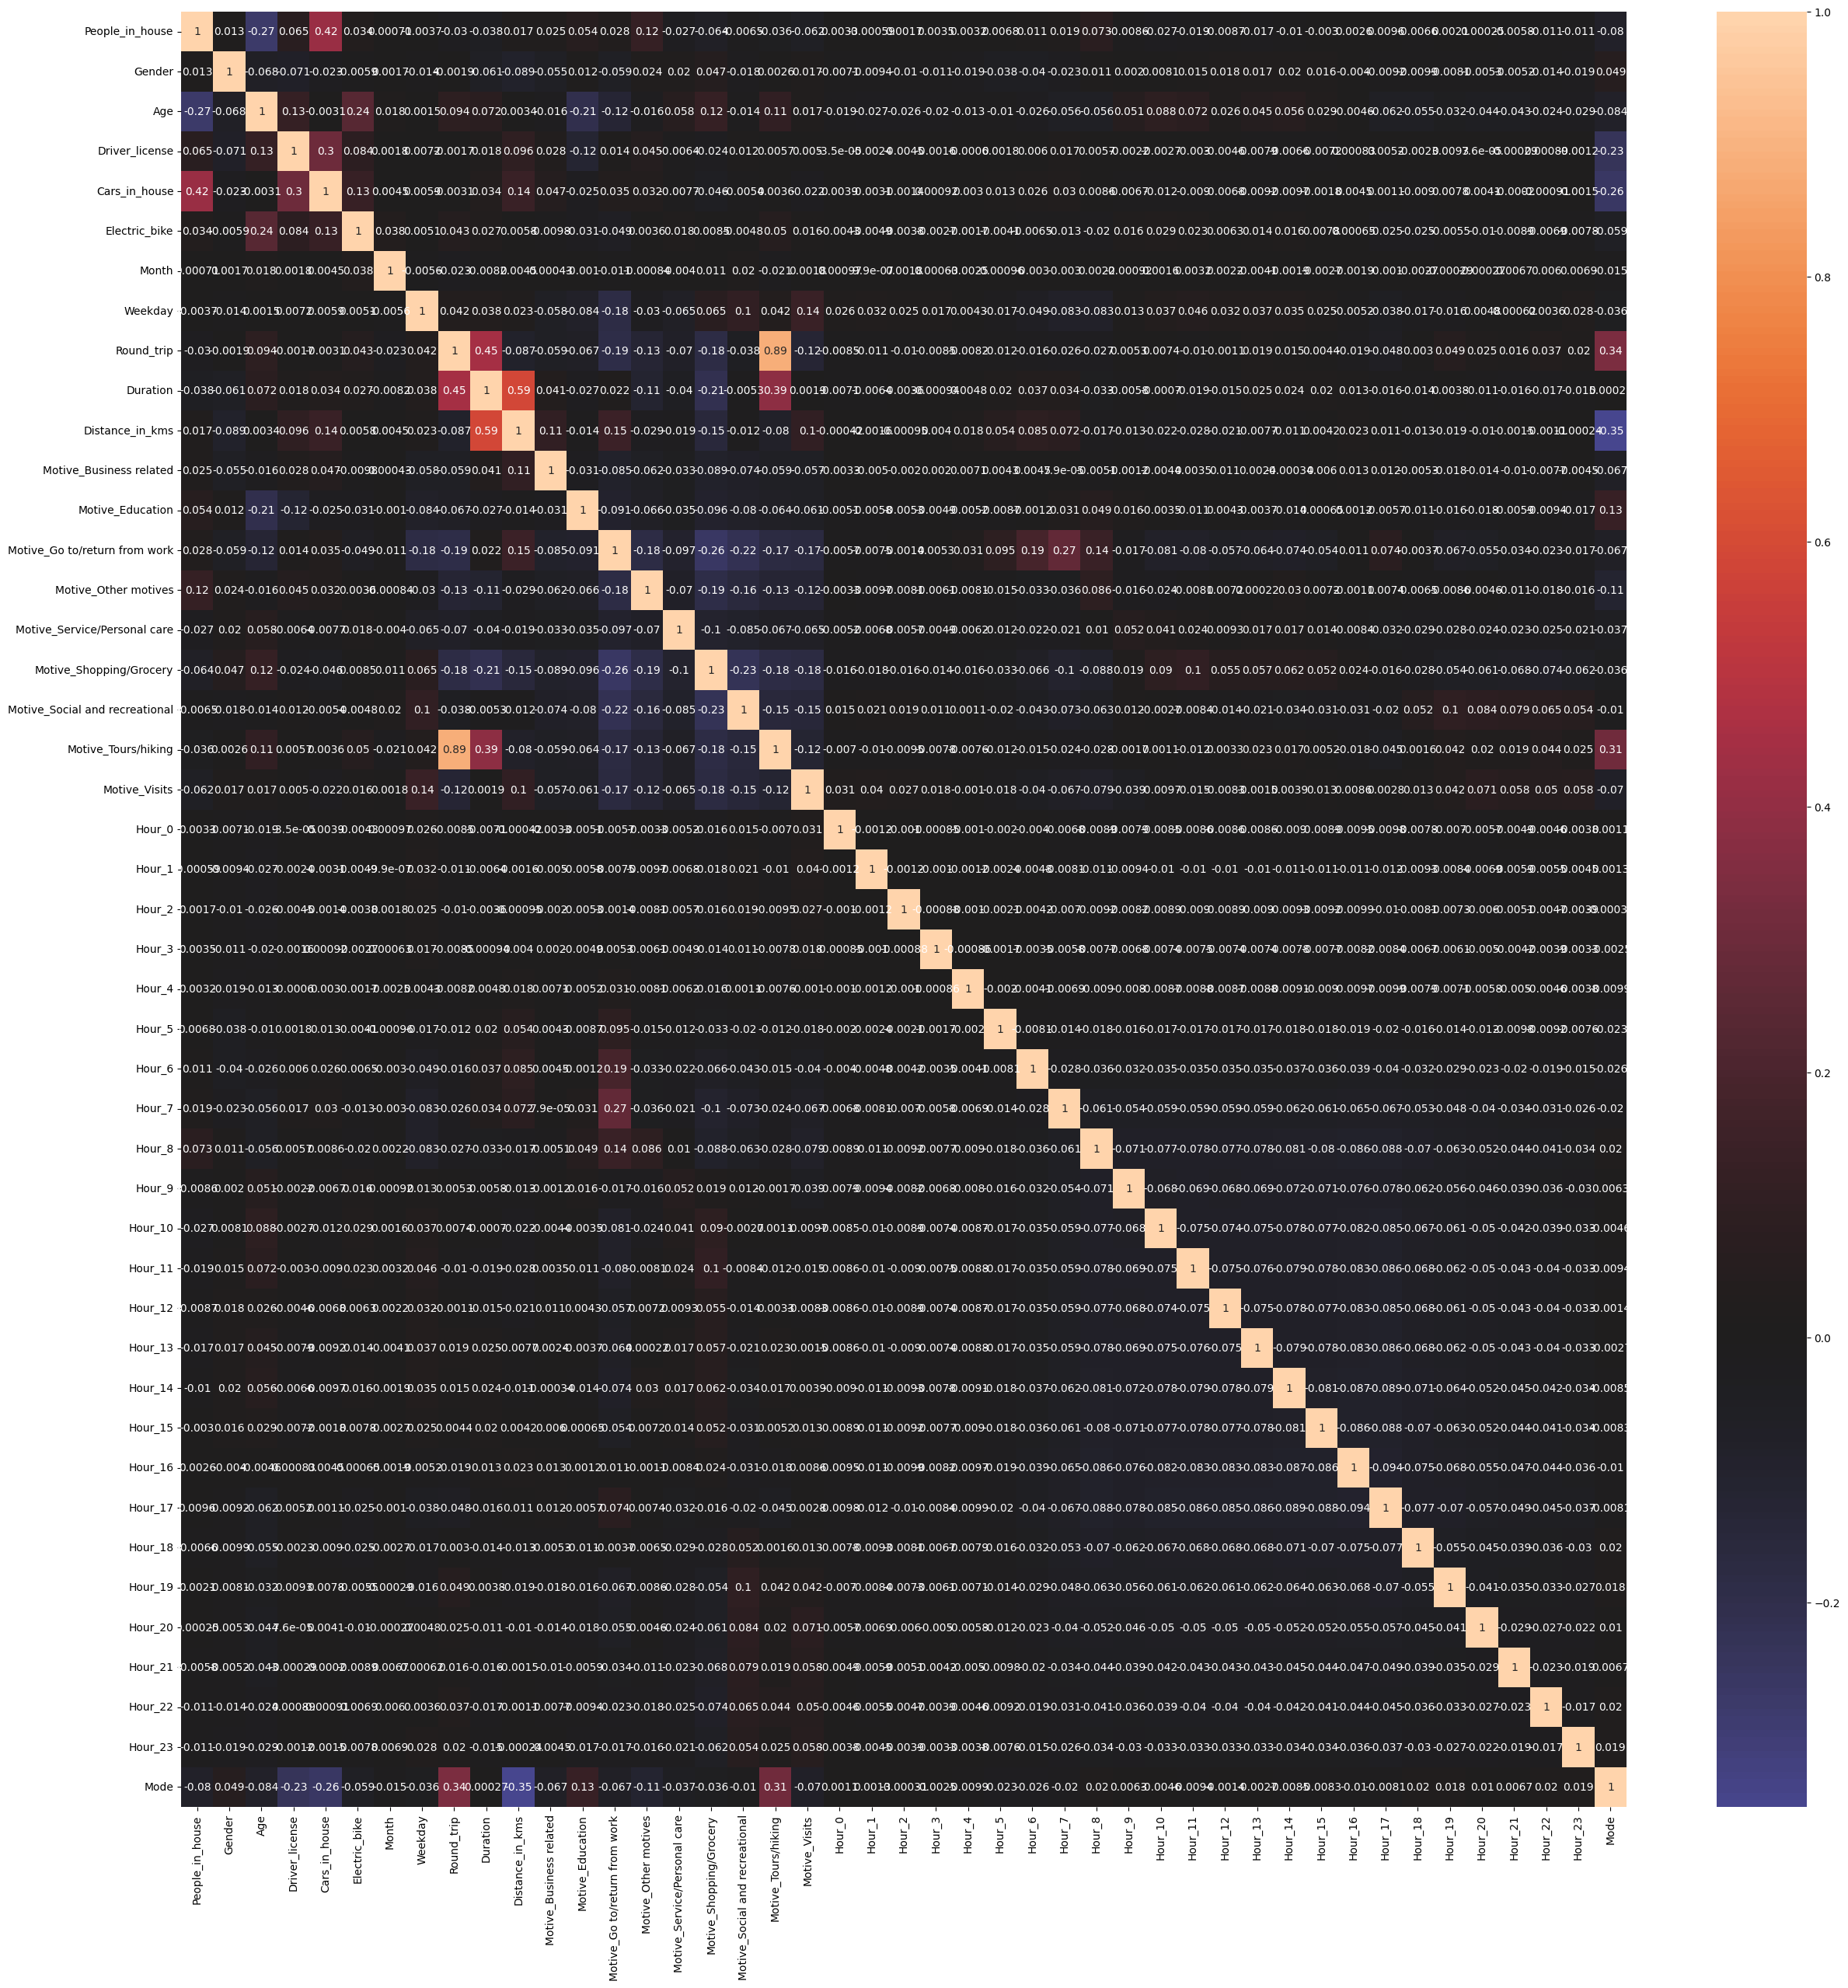

In [104]:
corrMatrix = dftrain.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [14]:
drops = ["Mode"]
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [15]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                          Variable       VIF
0                            const  0.000000
1                  People_in_house  1.369381
2                           Gender  1.030468
3                              Age  1.314410
4                   Driver_license  1.140865
5                    Cars_in_house  1.381766
6                    Electric_bike  1.086653
7                            Month  1.003021
8                          Weekday  1.100534
9                       Round_trip  5.655381
10                        Duration  2.486425
11                 Distance_in_kms  2.011531
12         Motive_Business related       inf
13                Motive_Education       inf
14   Motive_Go to/return from work       inf
15            Motive_Other motives       inf
16    Motive_Service/Personal care       inf
17         Motive_Shopping/Grocery       inf
18  Motive_Social and recreational       inf
19             Motive_Tours/hiking       inf
20                   Motive_Visits       inf
21        

In [16]:
drops = ["Mode", 'Motive_Tours/hiking', 'Hour_7']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [17]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                          Variable         VIF
0                            const  109.225086
1                  People_in_house    1.369381
2                           Gender    1.030468
3                              Age    1.314410
4                   Driver_license    1.140865
5                    Cars_in_house    1.381766
6                    Electric_bike    1.086653
7                            Month    1.003021
8                          Weekday    1.100534
9                       Round_trip    5.655381
10                        Duration    2.486425
11                 Distance_in_kms    2.011531
12         Motive_Business related    2.330242
13                Motive_Education    2.583869
14   Motive_Go to/return from work    8.900349
15            Motive_Other motives    5.880750
16    Motive_Service/Personal care    2.672887
17         Motive_Shopping/Grocery    8.920382
18  Motive_Social and recreational    6.352930
19                   Motive_Visits    5.346245
20           

Those are the final features that we will use

In [105]:
drops = ["Mode", 'Motive_Tours/hiking', 'Hour_7']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [106]:
drops = ["Mode", 'Motive_Tours/hiking', 'Hour_7']
X_test = dftest.drop(drops, axis=1)
y_test = dftest["Mode"]

In [107]:
X_train

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Duration,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,5,1,18,1,2,0,7,2,0,23,...,0,1,0,0,0,0,0,0,0,0
1,2,0,66,1,2,0,4,3,1,90,...,0,0,0,0,0,0,0,0,0,0
2,3,0,28,1,2,0,3,5,0,40,...,0,0,0,0,0,0,0,0,0,0
3,1,0,87,1,0,0,7,4,0,20,...,0,0,0,0,0,0,0,0,0,0
4,3,1,29,1,1,0,3,4,0,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579802,4,1,27,1,3,0,9,5,0,50,...,0,0,0,0,0,0,0,0,0,0
579803,5,1,22,1,0,0,9,5,0,15,...,1,0,0,0,0,0,0,0,0,0
579804,2,1,40,0,1,1,1,2,0,15,...,0,0,0,0,0,0,0,0,0,0
579805,2,1,29,1,1,0,7,2,0,20,...,0,0,0,0,1,0,0,0,0,0


In [108]:
X_test

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Electric_bike,Month,Weekday,Round_trip,Duration,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2,0,23,1,0,0,10,1,0,5,...,0,0,0,0,1,0,0,0,0,0
1,1,0,25,1,0,0,6,4,0,5,...,0,0,0,1,0,0,0,0,0,0
2,5,1,48,1,1,1,9,4,0,5,...,0,0,0,0,0,0,0,0,0,0
3,2,0,80,1,1,1,7,1,0,30,...,0,0,0,0,1,0,0,0,0,0
4,2,1,52,1,1,0,4,7,0,80,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64419,1,0,30,1,1,0,10,3,0,38,...,0,0,0,0,0,0,0,0,0,0
64420,2,0,29,1,1,0,10,2,0,5,...,0,0,0,0,0,1,0,0,0,0
64421,2,1,67,1,1,0,9,6,0,10,...,0,0,0,0,1,0,0,0,0,0
64422,1,1,28,1,0,0,4,6,0,28,...,0,1,0,0,0,0,0,0,0,0


In [109]:
sf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Logistic Regression

In [171]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [172]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400],
               'classifier__C': [10]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=sf, scoring='f1_macro')
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__C': 10, 'classifier__max_iter': 400, 'classifier__solver': 'liblinear'}


In [173]:
score = grid_search_log.best_score_
score

0.5868633483194983

In [176]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80     30006
           1       0.53      0.43      0.47     16176
           2       0.76      0.85      0.80     15832
           3       0.18      0.63      0.28      2410

    accuracy                           0.68     64424
   macro avg       0.59      0.66      0.59     64424
weighted avg       0.73      0.68      0.70     64424



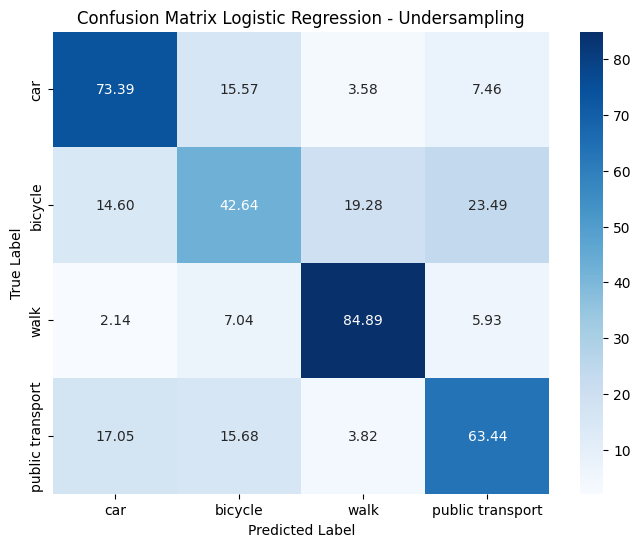

In [177]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [178]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

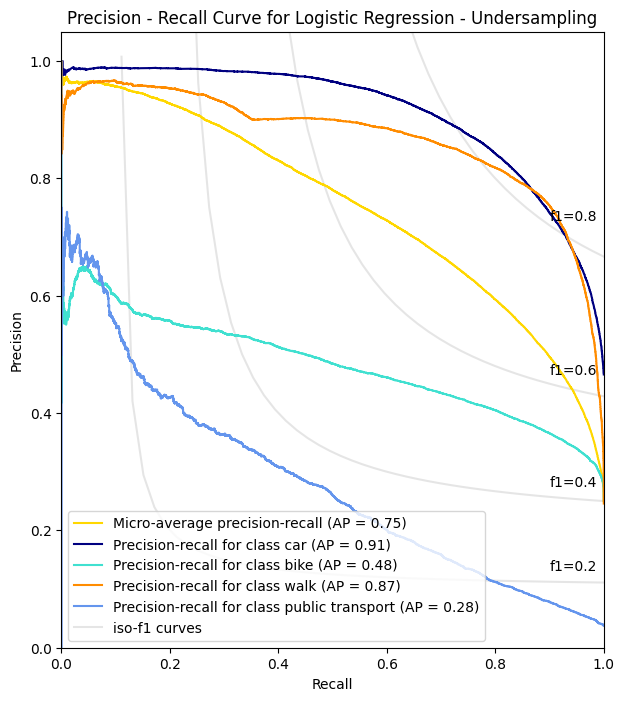

In [179]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Undersampling")

plt.show()

# Decision Tree

In [123]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [124]:
param_grid = {
    'classifier__max_depth': list(range(2, 21)),
}

In [125]:
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")

In [126]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20]},
             scoring='f1_macro')

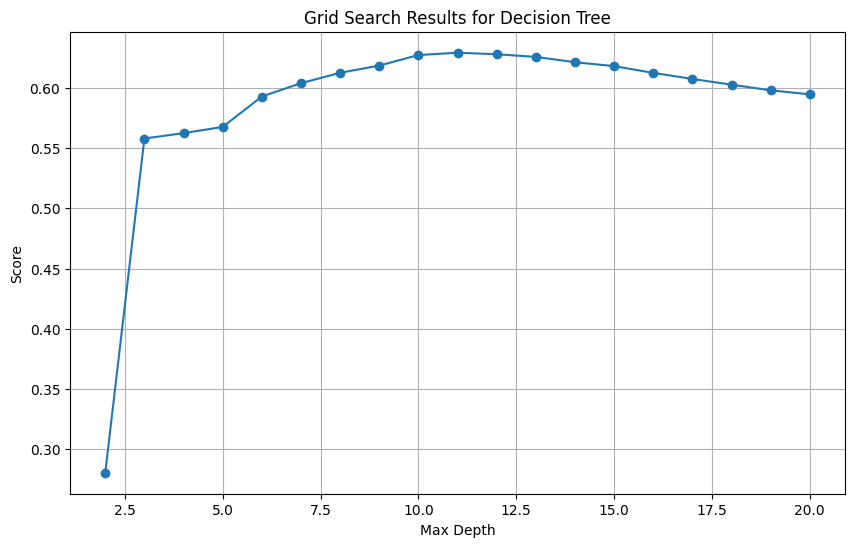

In [127]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [128]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [129]:
best_params

{'classifier__max_depth': 11}

In [130]:
best_f_score

0.6292706422553865

In [131]:
y_pred = best_model.predict(X_train)
tree_report_test = classification_report(y_train, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.69      0.79    270054
           1       0.55      0.66      0.60    145580
           2       0.84      0.84      0.84    142483
           3       0.24      0.65      0.35     21690

    accuracy                           0.72    579807
   macro avg       0.64      0.71      0.64    579807
weighted avg       0.78      0.72      0.74    579807



In [132]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.69      0.79     30006
           1       0.55      0.67      0.60     16176
           2       0.84      0.83      0.83     15832
           3       0.23      0.62      0.33      2410

    accuracy                           0.72     64424
   macro avg       0.63      0.70      0.64     64424
weighted avg       0.78      0.72      0.74     64424



In [133]:
X_train.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='object')

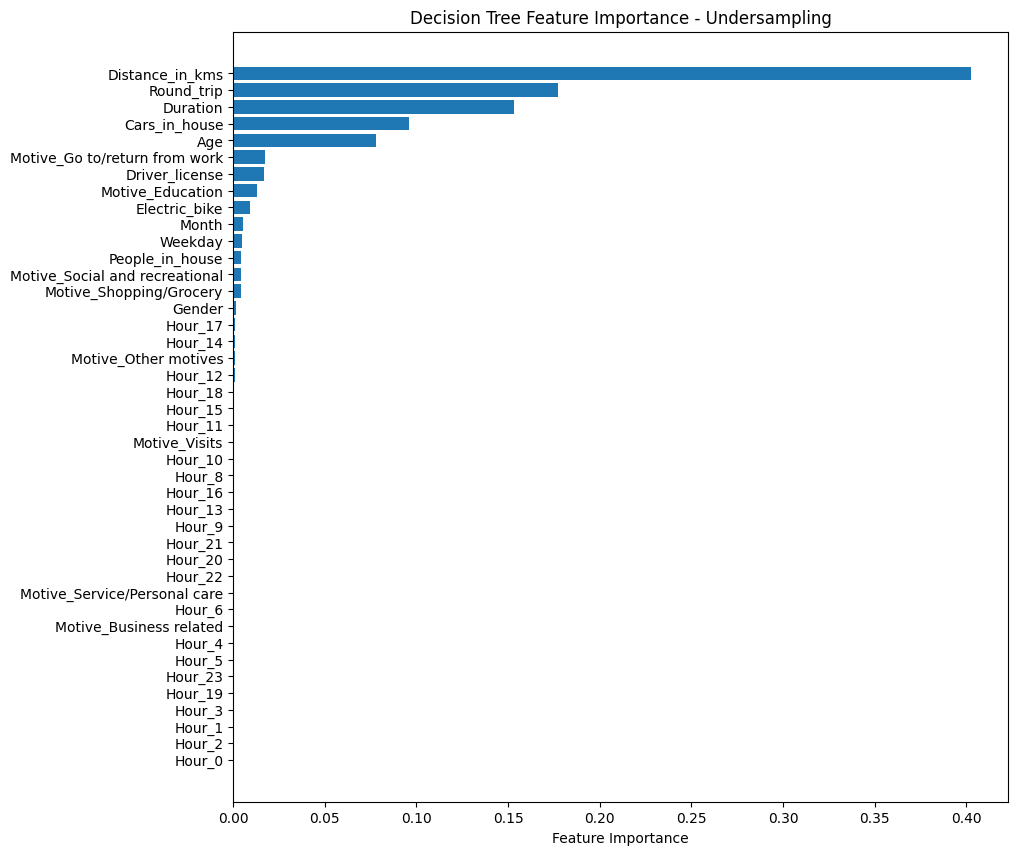

In [134]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance - Undersampling")
plt.show()

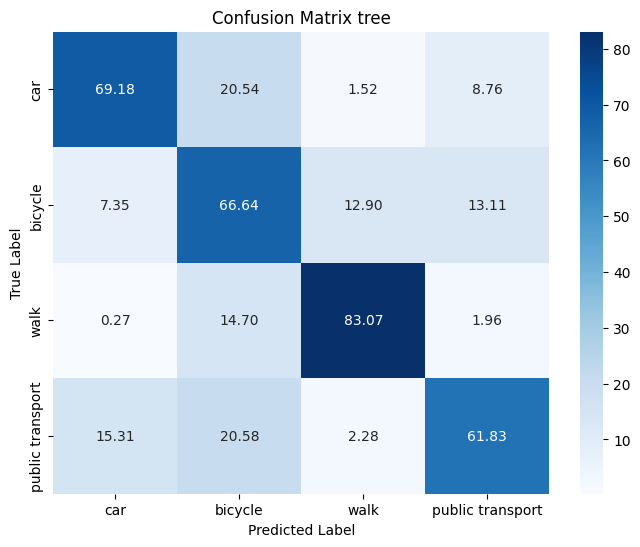

In [135]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [136]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

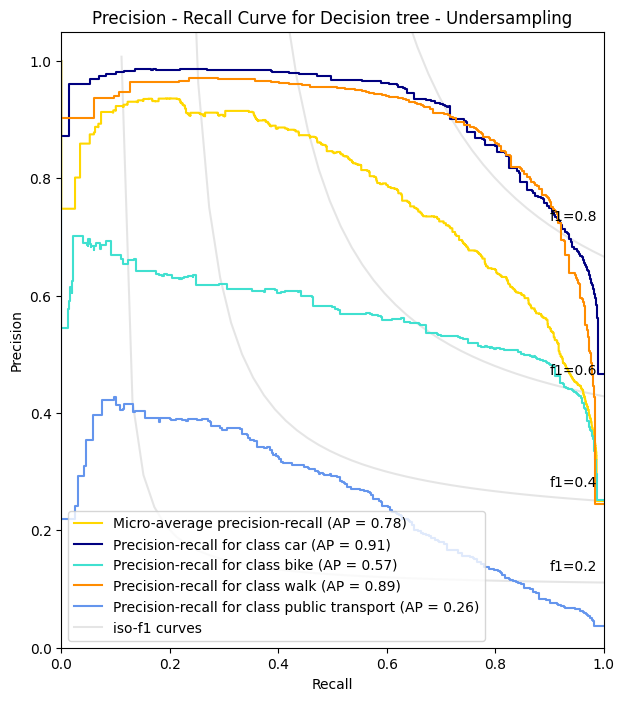

In [137]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Undersampling")

plt.show()

# Random Forest

In [193]:
X_train.shape

(579807, 42)

In [194]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [196]:
param_grid = {
    'classifier__max_features' : list(range(16, 27))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=sf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': [16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26]},
             scoring='f1_macro')

In [197]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 16}


In [198]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6604758341056685


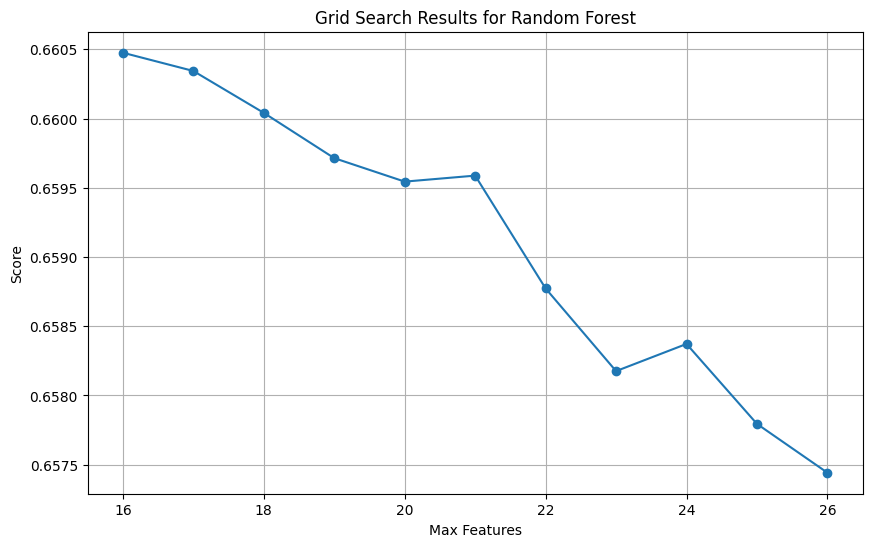

In [199]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [200]:
param_grid = {
    'classifier__n_estimators' : [300, 400],
    'classifier__max_features' : [16]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=sf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': [16],
                         'classifier__n_estimators': [300, 400]},
             scoring='f1_macro')

In [201]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 16, 'classifier__n_estimators': 300}


In [202]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6618882266891435


In [203]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_train)
tree_report_test = classification_report(y_train, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    270054
           1       0.65      0.70      0.67    145580
           2       0.85      0.89      0.87    142483
           3       0.34      1.00      0.51     21690

    accuracy                           0.78    579807
   macro avg       0.70      0.83      0.72    579807
weighted avg       0.83      0.78      0.79    579807



In [204]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     30006
           1       0.60      0.65      0.62     16176
           2       0.83      0.86      0.85     15832
           3       0.25      0.73      0.37      2410

    accuracy                           0.74     64424
   macro avg       0.65      0.74      0.66     64424
weighted avg       0.80      0.74      0.76     64424



In [205]:
X_train.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='object')

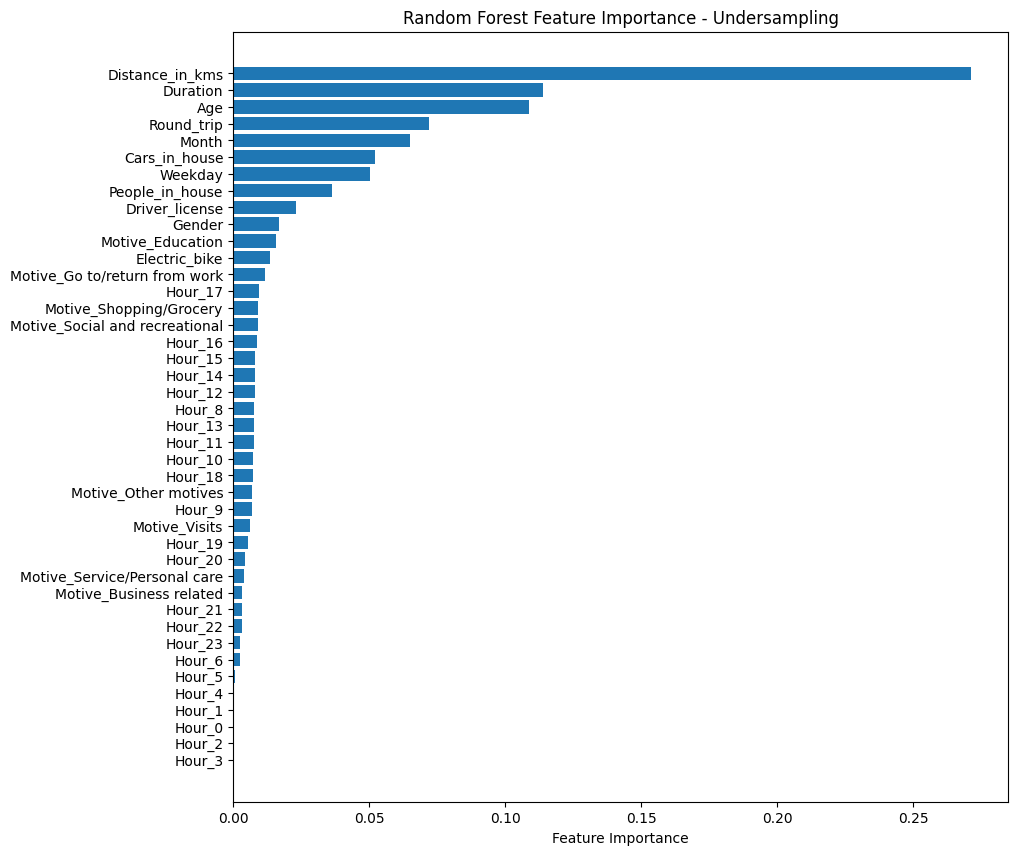

In [206]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance - Undersampling")
plt.show()

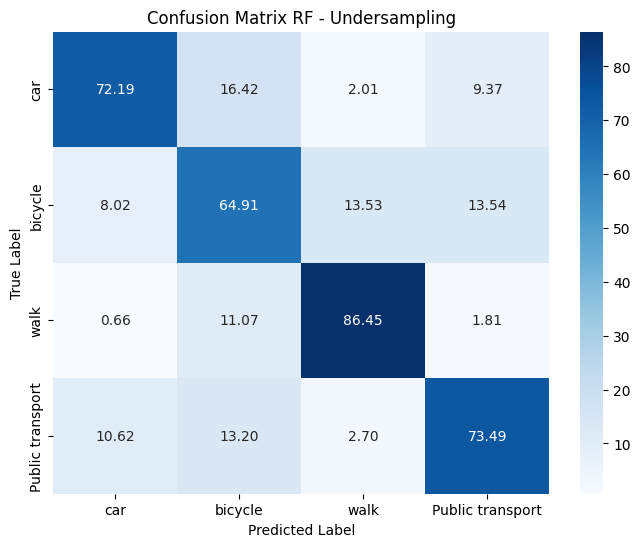

In [207]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

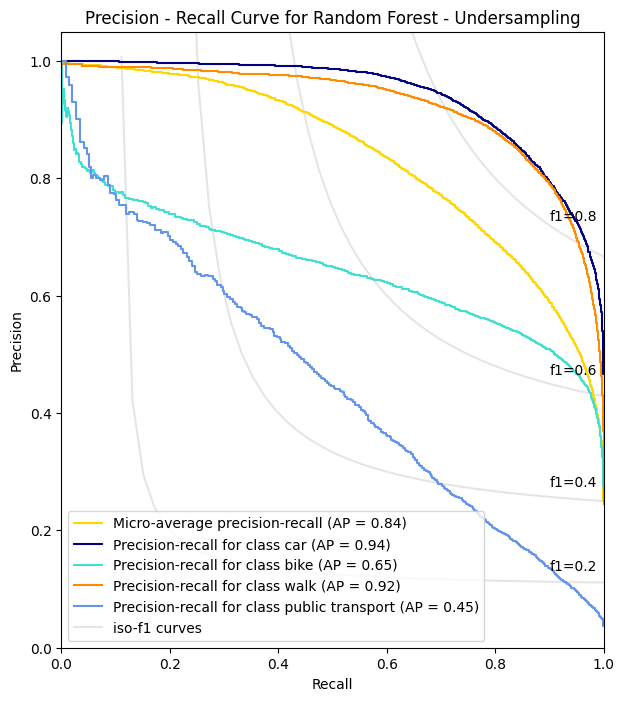

In [208]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Undersampling")

plt.show()

# XGBoost

In [141]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [142]:
param_grid = {
    'classifier__colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1]},
             scoring='f1_macro')

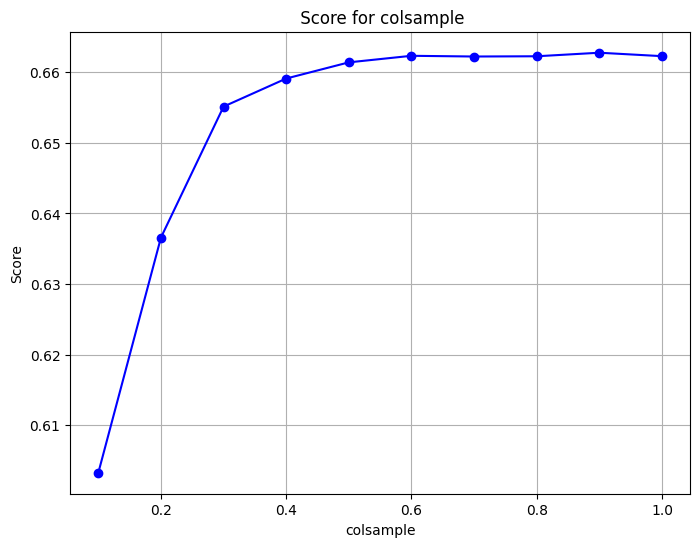

In [143]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [153]:
param_grid = {
    'classifier__subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

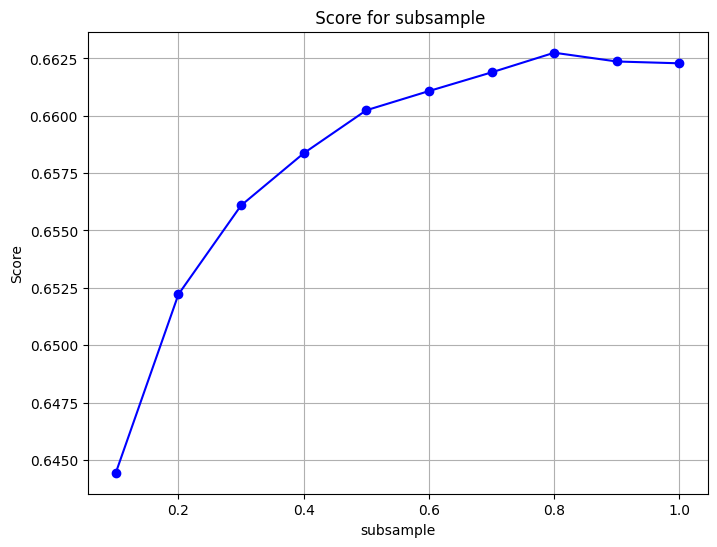

In [154]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [156]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

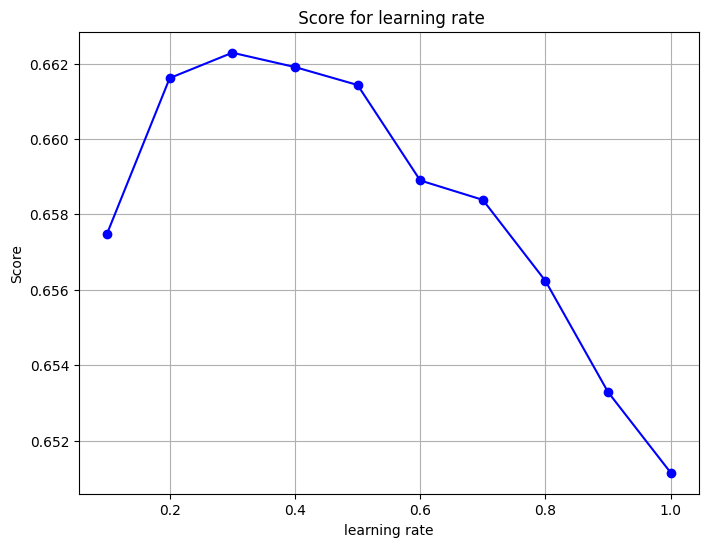

In [157]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [158]:
param_grid = {
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

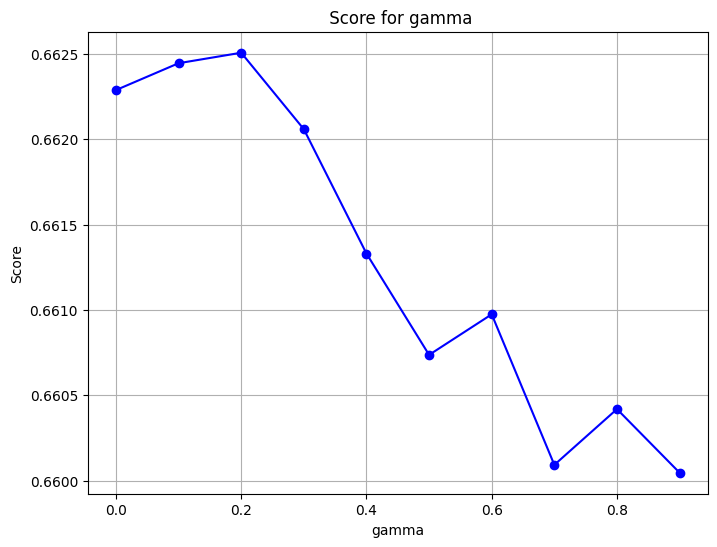

In [159]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__gamma']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for gamma')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [160]:
param_grid = {
    'classifier__reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

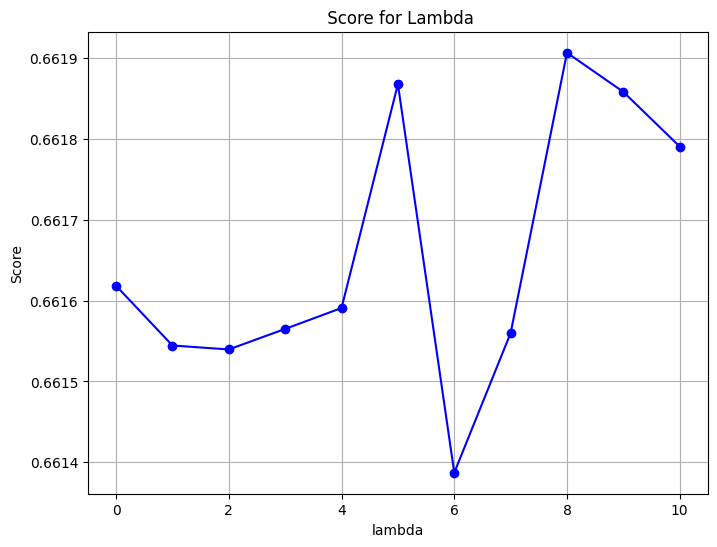

In [161]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__reg_lambda']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Lambda')
plt.xlabel('lambda')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [162]:
param_grid = {
    'classifier__learning_rate' : [0.3],
    'classifier__subsample' : [0.8], 
    'classifier__n_estimators' : [350, 450],
    'classifier__colsample_bytree' : [0.9],
    'classifier__gamma' : [0.2],
    'classifier__reg_lambda' : [0]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=sf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.3, 'classifier__n_estimators': 350, 'classifier__reg_lambda': 0, 'classifier__subsample': 0.8}


In [163]:
score = grid_search.best_score_
score

0.6577109088402772

In [164]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82    270054
           1       0.62      0.68      0.65    145580
           2       0.84      0.87      0.85    142483
           3       0.30      0.86      0.45     21690

    accuracy                           0.76    579807
   macro avg       0.67      0.79      0.69    579807
weighted avg       0.81      0.76      0.77    579807



In [165]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81     30006
           1       0.60      0.66      0.63     16176
           2       0.83      0.85      0.84     15832
           3       0.24      0.70      0.36      2410

    accuracy                           0.74     64424
   macro avg       0.65      0.73      0.66     64424
weighted avg       0.79      0.74      0.76     64424



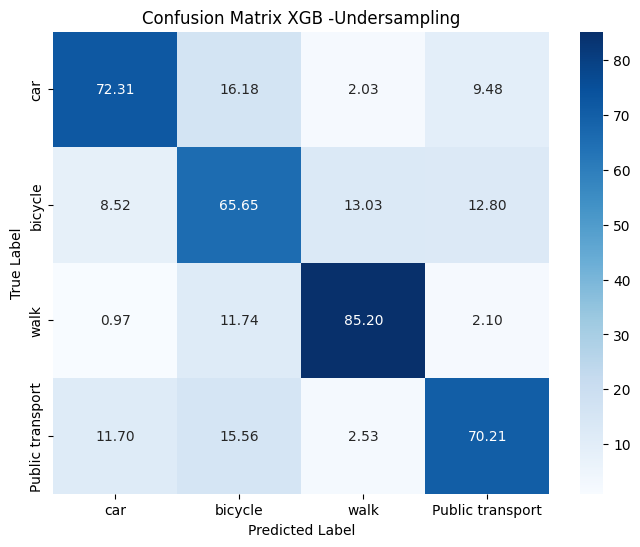

In [166]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

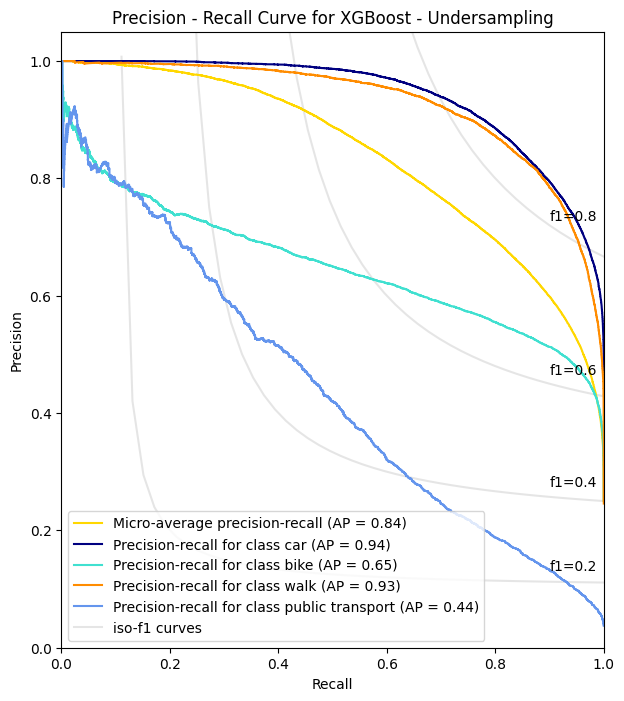

In [167]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Undersampling")

plt.show()

In [168]:
X_train.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='object')

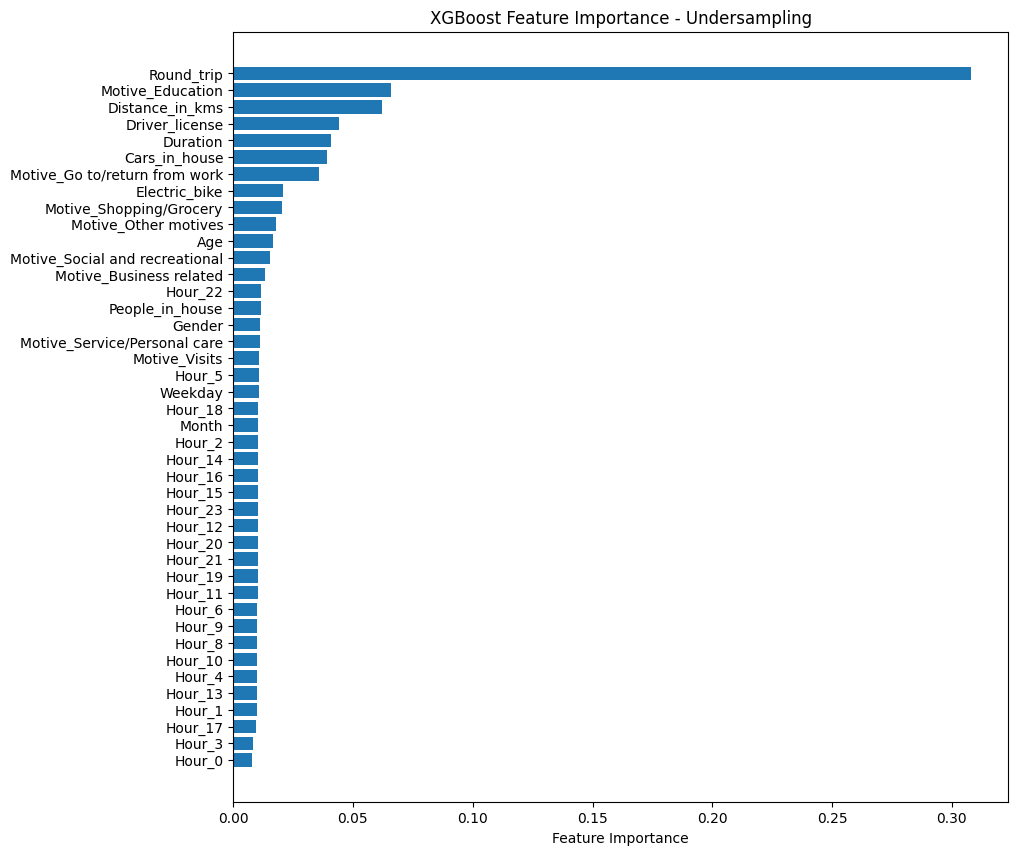

In [169]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Electric_bike', 'Month', 'Weekday', 'Round_trip', 'Duration',
       'Distance_in_kms', 'Motive_Business related', 'Motive_Education',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Personal care', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance - Undersampling")
plt.show()